In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: Santiago silva
---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y encuentre $f'(\pi/8)$ variando el $h$ y encuentre el error de convergencia, comparando su respuesta con el valor exacto.

* Determine $f''(\pi/8)$ con $h = 0.05$ y encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



In [ ]:
def five_point_derivative(f, x, h):
    """Aproximación de la primera derivada"""
    return (-f(x + 2*h) + 8*f(x + h) - 8*f(x - h) + f(x - 2*h)) / (12*h)

def five_point_second_derivative(f, x, h):
    """Aproximación de la segunda derivada."""
    return (-f(x + 2*h) + 16*f(x + h) - 30*f(x) + 16*f(x - h) - f(x - 2*h)) / (12*h**2)

#f(x) = cos(x)
f = np.cos

#arreglo de 10 datos en el intervalo [0, 2π]
x_vals = np.linspace(0, 2*np.pi, 10)
f_vals = f(x_vals)

#evaluamos la 1 derivada para distintos h
x0 = np.pi / 8
h_values = [0.005, 0.01, 0.05, 0.1, 0.5, 0.9, 1]
exact_derivative = -np.sin(x0)

print("Primera derivada de f(x) = cos(x) en x = π/8:")
for h in h_values:
    approx = five_point_derivative(f, x0, h)
    error = abs(approx - exact_derivative)
    print(f"h = {h:>6} -> Aproximación: {approx:.12f}, Error: {error:.6e}")

#segunda derivada en x = π/8 con h = 0.05
h_second = 0.05
exact_second_derivative = -np.cos(x0)
second_approx = five_point_second_derivative(f, x0, h_second)
second_error = abs(second_approx - exact_second_derivative)

print("Segunda derivada de f(x) = cos(x) en x = π/8 con h = 0.05:")
print(f"Aproximación: {second_approx:.12f}, Error: {second_error:.6e}")

print("Al reducir h, mejora la aproximación para la primera y segunda derivada, pero, hasta cierto punto, antes de que los errores del redondeo dominen")

Primera derivada de f(x) = cos(x) en x = π/8:
h =  0.005 -> Aproximación: -0.382683432357, Error: 7.974510e-12
h =   0.01 -> Aproximación: -0.382683432238, Error: 1.275585e-10
h =   0.05 -> Aproximación: -0.382683352663, Error: 7.970199e-08
h =    0.1 -> Aproximación: -0.382682158271, Error: 1.274094e-06
h =    0.5 -> Aproximación: -0.381909560237, Error: 7.738721e-04
h =    0.9 -> Aproximación: -0.375084164729, Error: 7.599268e-03
h =      1 -> Aproximación: -0.371360496213, Error: 1.132294e-02
Segunda derivada de f(x) = cos(x) en x = π/8 con h = 0.05:
Aproximación: -0.923879468367, Error: 6.414398e-08
Al reducir h, mejora la aproximación para la primera y segunda derivada, pero, hasta cierto punto, antes de que los errores del redondeo dominen


#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`. Realice un gráfico logaritmico de los errores.

*   ¿Cuál será el valor óptimo de $h$?

In [4]:
pip install scipy==1.9.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.4/33.4 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 73.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
stumpy 1.13.0 requires scipy>=1.10, but you have scipy 1.9.3 which is incompatible.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.9.3 which is incompatible.
xarray-einstats 0.9.0 requires scipy>=1.11, but you have scipy 1.9.3 which is incompatible.
cvxpy 1.6.5 requires scipy>

Derivada exacta f'(2.0): 22.16716829679195
Derivada con gradient: 22.107634360343127
Derivada con scipy: 22.167168297393403
Derivada segunda exacta f''(2.0): 29.5562243957226
Derivada segunda con scipy: 29.560354164459568


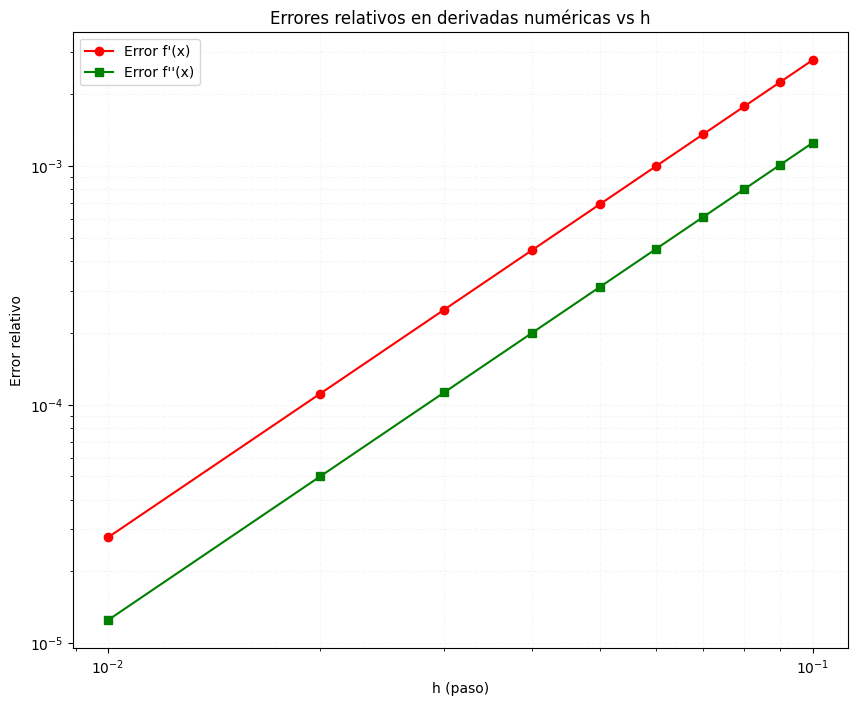

In [2]:
from scipy.misc import derivative

def f(x):
    return x * np.exp(x)

#derivadas exactas en x = 2.0
x0 = 2.0
fprime_exac = np.exp(x0) * (1 + x0)
fd_prime_exac = np.exp(x0) * (2 + x0)

#valores de h
h_values = np.linspace(0.01, 0.1, 10)

#arreglos para errores
error_f1 = []
error_f2 = []

#ahora derivamos usando diferencias finitas centradas
for h in h_values:

    x_vals = np.linspace(1.8, 2.2, 6)
    idx = np.argmin(np.abs(x_vals - x0))

    #primera derivada centrada
    f1 = (f(x0 + h) - f(x0 - h)) / (2 * h)

    #segunda derivada centrada
    f2 = (f(x0 + h) - 2*f(x0) + f(x0 - h)) / (h**2)

    #errores relativos
    error_f1.append(np.abs(f1 - fprime_exac) / np.abs(fprime_exac))
    error_f2.append(np.abs(f2 - fd_prime_exac) / np.abs(fd_prime_exac))

#comparamos con numpy.gradient
x_dense = np.linspace(1.8, 2.2, 100)
f_vals = f(x_dense)
f1_grad = np.gradient(f_vals, x_dense)[np.argmin(np.abs(x_dense - x0))]

#comparación con scipy.derivative
f1_scipy = derivative(f, x0, dx = 1e-6, n = 1)
f2_scipy = derivative(f, x0, dx = 1e-6, n = 2)


print(f"Derivada exacta f'(2.0): {fprime_exac}")
print(f"Derivada con gradient: {f1_grad}")
print(f"Derivada con scipy: {f1_scipy}")
print(f"Derivada segunda exacta f''(2.0): {fd_prime_exac}")
print(f"Derivada segunda con scipy: {f2_scipy}")

# Gráfico de errores
plt.figure(figsize=(10, 8))
plt.loglog(h_values, error_f1, 'ro-', label="Error f'(x)")
plt.loglog(h_values, error_f2, 'gs-', label="Error f''(x)")
plt.xlabel('h (paso)')
plt.ylabel('Error relativo')
plt.title("Errores relativos en derivadas numéricas vs h")
plt.legend()
plt.grid(True, which="both", ls="--", alpha = 0.1)